In [5]:
## This file is an implementaion of the pd controller class
## Author : Avadesh Meduri
## Date : 22/06/2020

import numpy
%run one_dof_manipulator.ipynb #imports OneDOFMan

In [16]:
class PDController:
    
    def __init__(self, p_gain, d_gain):
        '''
        Input:
            p_gain : proportional gain
            d_gain : derivative gain
        '''
        self.p_gain = p_gain
        self.d_gain = d_gain
    
    def compute_torque(self, joint_position, joint_velocity, des_joint_position, des_joint_velocity):
        '''
        This function computes the desired torque for each joint to track the
        desired joint position and velocity
        Input:
            joint_position : joint position at the given time step
            joint_velocity : joint velocity at the given time step
            des_joint_position : desired joint position at the given time step
            des_joint_velocity : desired joint velocity at the given time step
        '''
         
        proportional_error = des_joint_position - joint_position
        derivative_error = des_joint_velocity - joint_velocity
        
        torque = self.p_gain*proportional_error + self.d_gain*derivative_error
        
        return torque


<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAAuDm1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIHIyODU0IGU5YTU5MDMgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE3IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9OSBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAABVMZYiE
ADP//vbsvgU1/Z/QlxEsxdpKcD4qpICAdzTAAAADAAB4He8+UME3qAgRTiWJKRt6UnB+ffx/1NJf
rfSIRIFrG5v/PJHcJQU+r+1pITjk+RjUSELAAACn53pN+mG1+ZcUDZnpL91DwtQnbYxyL3VaaHaW
HXqiNAONA+OltZTLhbS76zGRxcrzmWm9mKmxES52uIXUZfFMZzbzM5iI1lkyh3TsMon2NzLwyoQV
Jpx5jyLmnQ/T8ImwFKMgmphi2TEEJuX27ds5AQfzaBtaRcGao1tRg/I9h0DTlZbOLB93gF0QMNBj
Z78yQobtjo/n1t9aiytrHr/Qg1AMKNkThpEivW9TZJ3lG44BP/Q6oh1dmJA643BGpwK6t+MyXZzA
KtJvnDlZxlxlO9F282XcWdE3CNXu9wRcreQD5ymNhS3aygHHT16Vt3x2ij13dU4rrkwkQRd6zspQ
luTHd63MbjRzIcHBBlgzK0Tz5vqGo+Pd5RRiDDM4yugnSmJIrhKCWO4FXXKJ1X4la+fc5HXcUu1A
gEtN+2XcglcB4n1slRybfsEyKcAahtLMgD7Th0py7s+7OOOeUIgRmbg5YRs3DTDpcZ5NinZJsXHV
SRN3joxXLuFePyrdzDHitNYVD9HZJesTB/CSW0QQVLlvh5UTrzTTtYU3TR4ecB9LRUbraPEpM7+x
SLzQljUk4u4ICSv/Xs0JJT1M9TdNlGNXY8XCgPh7FN4cxlItmHaiQnpGW/rOQ8uT0xXCwBUgH1FR
ozTOl2KB/o5kEWY4v/hW09613fZbh2EpHTjibjIv7RaNpwcygEhCNhE8/JGBYdORfv3cRNfYY+mo
6ScDlE9/av1AiNART+yMEkcaV0qO+tythZP5pDuQ1yDSIxzKFXCdAZi5qGfyKvv/oPvUWtWY3hFm
6wn1SRSuFb6Rdkg5wgeP2MSQQ55K8yGAlJxBCDTH/7uA+NU8rSJqbZs774NX1SlmCybqngX8g2kT
KALp04FdiYwrBHwM/+YiNBBxrvK3f2aRju4KoYSEuKtp/KXnFM12HGLggJaKY/R7dSqtjnoT3OOm
6PIuknbIbwLheB1kBXZE3VQF1a1qz1dCuNUesmbVhWpIhACZt+ZGaY7nC/IxiUdWFiKUpp7ngJdo
+MYZL7u/Wxd4MC6M0votg/WuSYfW8O9eGwcJZVdWpxoS9QnnTY6tW6y0h/BfaGf3MDpZUm1O9hpI
QSyjMeoy561xgMT2aArKoR0mUVpQVlfIM5DEu+CAQ0xrp3YgCL/HClsdVsfBszUBXEBZHlLO++KH
ZI5Fz0KEE++tJdtLBOoNkIKzLLiVhFFRTtqeQDJYjde9BzrBjAn7ZK035RfODW50QwOz8Q8qCVYE
1JHY5W3ZfhbTEWFfOZmmckmjoJZHzsbgPis/phMJv+EFYwwMMa9qvq5UdleV7mJM3RK/dhpld+K9
U/76prf9UvCd/W8Pq0gLt0ZYbzvIQt12/p7dpgnve21sQ4MLji5YYbm04Bd1wlIc293VW5kf8Nu2
w0aCa6sDkmjg6PgeSgEM/nys6UYA4H20QlldZBtkdv1WzRCmN/uBozrY6K0JHDWvk4BwZ7+cauAH
VDxB1e1UdRz3MEr4dTFsGYmgmeJ1CJtB6vLcSfGxxvifeBmWBMbJR1SsLdNGyeCfgUbq0W39DP0k
2625mmFfvt9gRaLMSNbcL0S9YCKE6DytJ6IdLPB8+EHZp5mNd+XyBwkcFpDnHoKjASLHuRp6tnjz
KWrnMe62PRBXv/rn6bKXE1Pf4VbcFCUGgjGvriJDvqSsbyX4f6Kv96RzIgsm20QFEkfUsRAKB3fL
dEGo9570TskAZk+IY1T9AhzXMaKN3C91wbIYlvqP2YzMC2H+C9Are4QuGzidWWst5h8s0OJrUAKs
7npD4J6+IiSOEM4EFb9uqFnTBAozUg60RI+uiN1FNakUX2OtDfQXAi1D+I9FGwCsMJBw9byh6r3b
Yo3+C2xhbBvQvC1jyxVxJNf+HZFu1AuQd/xothAm2Q0YXplPwAQU6fvot4QkGItfM5YzgUnPafrd
ePUzTqFBJjmq4alCWqb4ayBd4zOx3UfEPch1nwUU8fYgsXoWhm/oQNAaiHJYDAJVxAXMLDOQH9qy
cLvVSGvZEuHfmAeVrbjBPyOWxV9PhNthHSGTH/BrDOyu3pA0z+aKo8N4naNQ9p2W7auv2XfW0UBP
NySAE3sTuj/76xExVSxqmFdBZTjTmY5tNRuU+u8KypzAZHSsLpAkSyWw0RNLv3XRe6vCDcFrs/Af
ZyXRtmcPrI5T1G8yslBY+FFOiEows419A0ZFfY5l0iTn8vNx8dxoyRv9xLurBvsdTsxUMTIy04PJ
CtPYpceHR3APWnKmr4oZ5q8gpPUV601ISta7YdWEouMTglvt/s/cxCN38ALzK43vhBctxjrZEzrx
Sd/9idQ1o9guMgm/RlsY2t9x96ZT+oZ1/UYDMGYAvOMSuPpxgah6GUPud5OIOtIA16xlbC02YZeC
Th9ZOks1kPdUQAn30NyckGywEUbrVN5j6ccvbaQataBBzNY5TUr7lm8W6xASyoqxBVy3IPsBKuMa
8MYHC/Ayb6DH3TaROAVmJ5yZgFWGQG8Am8zLD4Ca+wEfGGTq2hJyniWQsOG+D2YQmiJAJpKwbYp9
/9XjSuq5Xctspwt7T9BEm2ZlThz8YYXvo+mvwpIgvgJqxQ92yWiVMPR7WFow3RNdkKUh0/HJaBQ5
ZevZaWTti5H2b4jfn7+ubcYxuJp8wflkcaknlc6nhxzul6BX/DUfx94m8+wG8pUuF7rBOoX8Kc7/
+66aaYXRntDVI66mWKUtWD3L75Uy6KNmG329ZZkhUir5EslFgZMI6Ctjz4DTJgT3eSKEQdhOO4ZC
JQvva2KQU751El6gbwzu/

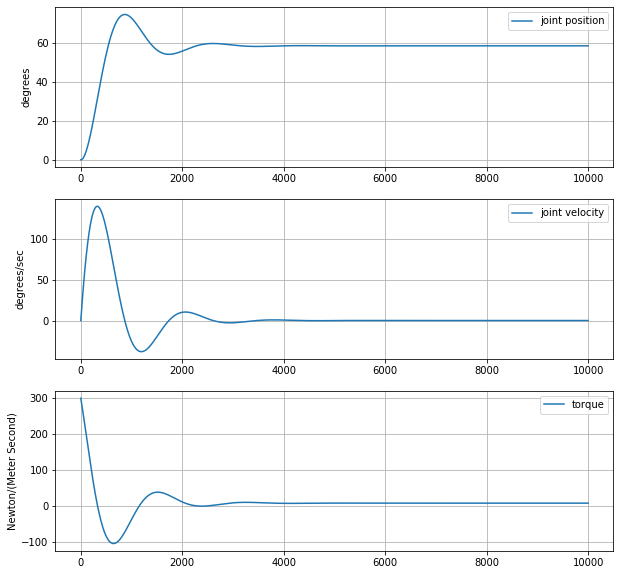

In [21]:
env = OneDOFManipulatorEnv(1, 1)
pd_ctrl = PDController(5, 1)

horizon = 10000 # duration of simulation steps
des_joint_position = 60
des_joint_velocity = 0

env.reset_manipulator(0,0)

for t in range(horizon):
    # obtaining current joint position and velocity
    joint_position = env.get_joint_position()
    joint_velocity = env.get_joint_velocity()
    
    torque = pd_ctrl.compute_torque(joint_position, joint_velocity, des_joint_position, des_joint_velocity)
    env.step_manipulator(torque, True)

env.animate()
env.plot()

### Possible questions

1. Implement PD Controller after reading theory using the PDController skeleton 
2. Use PD controller to understand gain tuning (importance of d gain damping)
3. implement trajectory generator in joint space and track